In [ ]:
import tensorflow as tf
print('TensorFlow :', tf.__version__)

TensorFlow : 2.8.0


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras_preprocessing import image
from shutil import copyfile
from google.colab import files

import zipfile
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATASET_PATH = '/content/drive/MyDrive/acne'

os.listdir(DATASET_PATH)

['Papule', 'Whitehead', 'Pustules', 'Blackhead', 'Nodules']

In [ ]:
print('Papula:', len(os.listdir('/content/drive/MyDrive/acne/Papule')))
print('Whitehead:', len(os.listdir('/content/drive/MyDrive/acne/Whitehead')))
print('Pustula:', len(os.listdir('/content/drive/MyDrive/acne/Pustules/')))
print('Blackhead:', len(os.listdir('/content/drive/MyDrive/acne/Blackhead/')))
print('Nodule:', len(os.listdir('/content/drive/MyDrive/acne/Nodules/')))

Papula: 50
Whitehead: 56
Pustula: 129
Blackhead: 51
Nodule: 59


In [ ]:
try:
    os.mkdir('/content/drive/MyDrive/dataset/acne')
    os.mkdir(os.path.join('/content/drive/MyDrive/dataset/acne', 'training'))
    os.mkdir(os.path.join('/content/drive/MyDrive/dataset/acne', 'testing'))
    os.mkdir(os.path.join('/content/drive/MyDrive/dataset/acne/training', 'papula'))
    os.mkdir(os.path.join('/content/drive/MyDrive/dataset/acne/training', 'whitehead'))
    os.mkdir(os.path.join('/content/drive/MyDrive/dataset/acne/training', 'pustula'))
    os.mkdir(os.path.join('/content/drive/MyDrive/dataset/acne/training', 'blackhead'))
    os.mkdir(os.path.join('/content/drive/MyDrive/dataset/acne/training', 'nodul'))
    os.mkdir(os.path.join('/content/drive/MyDrive/dataset/acne/testing', 'papula'))
    os.mkdir(os.path.join('/content/drive/MyDrive/dataset/acne/testing', 'whitehead'))
    os.mkdir(os.path.join('/content/drive/MyDrive/dataset/acne/testing', 'pustula'))
    os.mkdir(os.path.join('/content/drive/MyDrive/dataset/acne/testing', 'blackhead'))
    os.mkdir(os.path.join('/content/drive/MyDrive/dataset/acne/testing', 'nodul'))
except OSError:
    pass

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, VALIDATION, SPLIT_SIZE):
    # YOUR CODE STARTS HERE
    if not os.path.exists(TRAINING): 
        os.makedirs(TRAINING) 
                
    if not os.path.exists(TESTING): 
        os.makedirs(TESTING) 

    if not os.path.exists(VALIDATION): 
        os.makedirs(VALIDATION)

    file_names = os.listdir(SOURCE) 
    file_number = len(file_names) 

    for index, file in enumerate(file_names): 
        if index < SPLIT_SIZE * file_number: 
          if index < 0.8 * file_number:
            copyfile(os.path.join(SOURCE, file), os.path.join(TRAINING, file))
          else:
            copyfile(os.path.join(SOURCE, file), os.path.join(VALIDATION, file))
        else: 
            copyfile(os.path.join(SOURCE, file), os.path.join(TESTING, file)) 
        
PAPULA_SOURCE_DIR = "/content/drive/MyDrive/acne/Papule"
WHITEHEAD_SOURCE_DIR = "/content/drive/MyDrive/acne/Whitehead"
PUSTULA_SOURCE_DIR = "/content/drive/MyDrive/acne/Pustules"
BLACKHEAD_SOURCE_DIR = "/content/drive/MyDrive/acne/Blackhead"
NODUL_SOURCE_DIR = "/content/drive/MyDrive/acne/Nodules"

TRAINING_PAPULA_DIR = "/content/drive/MyDrive/dataset/acne/training/papula"
TRAINING_WHITEHEAD_DIR = "/content/drive/MyDrive/dataset/acne/training/whitehead"
TRAINING_PUSTULA_DIR = "/content/drive/MyDrive/dataset/acne/training/pustula"
TRAINING_BLACKHEAD_DIR = "/content/drive/MyDrive/dataset/acne/training/blackhead"
TRAINING_NODUL_DIR = "/content/drive/MyDrive/dataset/acne/training/nodul"

TESTING_PAPULA_DIR = "/content/drive/MyDrive/dataset/acne/testing/papula"
TESTING_WHITEHEAD_DIR = "/content/drive/MyDrive/dataset/acne/testing/whitehead"
TESTING_PUSTULA_DIR = "/content/drive/MyDrive/dataset/acne/testing/pustula"
TESTING_BLACKHEAD_DIR = "/content/drive/MyDrive/dataset/acne/testing/blackhead"
TESTING_NODUL_DIR = "/content/drive/MyDrive/dataset/acne/testing/nodul"

VALIDATION_PAPULA_DIR = "/content/drive/MyDrive/dataset/acne/validation/papula"
VALIDATION_WHITEHEAD_DIR = "/content/drive/MyDrive/dataset/acne/validation/whitehead"
VALIDATION_PUSTULA_DIR = "/content/drive/MyDrive/dataset/acne/validation/pustula"
VALIDATION_BLACKHEAD_DIR = "/content/drive/MyDrive/dataset/acne/validation/blackhead"
VALIDATION_NODUL_DIR = "/content/drive/MyDrive/dataset/acne/validation/nodul"


split_size = .9
split_data(PAPULA_SOURCE_DIR, TRAINING_PAPULA_DIR, TESTING_PAPULA_DIR, VALIDATION_PAPULA_DIR, split_size)
split_data(WHITEHEAD_SOURCE_DIR, TRAINING_WHITEHEAD_DIR, TESTING_WHITEHEAD_DIR, VALIDATION_WHITEHEAD_DIR, split_size)
split_data(PUSTULA_SOURCE_DIR, TRAINING_PUSTULA_DIR, TESTING_PUSTULA_DIR, VALIDATION_PUSTULA_DIR, split_size)
split_data(BLACKHEAD_SOURCE_DIR, TRAINING_BLACKHEAD_DIR, TESTING_BLACKHEAD_DIR, VALIDATION_BLACKHEAD_DIR, split_size)
split_data(NODUL_SOURCE_DIR, TRAINING_NODUL_DIR, TESTING_NODUL_DIR, VALIDATION_NODUL_DIR, split_size)

In [ ]:
train_papula = os.listdir(TRAINING_PAPULA_DIR)
train_whitehead = os.listdir(TRAINING_WHITEHEAD_DIR)
train_pustula = os.listdir(TRAINING_PUSTULA_DIR)
train_blackhead = os.listdir(TRAINING_BLACKHEAD_DIR)
train_nodul = os.listdir(TRAINING_NODUL_DIR)

test_papula = os.listdir(TESTING_PAPULA_DIR)
test_whitehead = os.listdir(TESTING_WHITEHEAD_DIR)
test_pustula = os.listdir(TESTING_PUSTULA_DIR)
test_blackhead = os.listdir(TESTING_BLACKHEAD_DIR)
test_nodul = os.listdir(TESTING_NODUL_DIR)

val_papula = os.listdir(VALIDATION_PAPULA_DIR)
val_whitehead = os.listdir(VALIDATION_WHITEHEAD_DIR)
val_pustula = os.listdir(VALIDATION_PUSTULA_DIR)
val_blackhead = os.listdir(VALIDATION_BLACKHEAD_DIR)
val_nodul = os.listdir(VALIDATION_NODUL_DIR)

print("Training")
print('Papula :', len(train_papula))
print('Whitehead :', len(train_whitehead))
print('Pustula :', len(train_pustula))
print('Blackhead :', len(train_blackhead))
print('Nodul :', len(train_nodul))

print("\nTesting")
print('Papula :', len(test_papula))
print('Whitehead :', len(test_whitehead))
print('Pustula :', len(test_pustula))
print('Blackhead :', len(test_blackhead))
print('Nodul :', len(test_nodul))

print("\nValidation")
print('Papula :', len(val_papula))
print('Whitehead :', len(val_whitehead))
print('Pustula :', len(val_pustula))
print('Blackhead :', len(val_blackhead))
print('Nodul :', len(val_nodul))

Training
Papula : 40
Whitehead : 45
Pustula : 104
Blackhead : 41
Nodul : 48

Testing
Papula : 5
Whitehead : 5
Pustula : 12
Blackhead : 5
Nodul : 5

Validation
Papula : 5
Whitehead : 6
Pustula : 13
Blackhead : 5
Nodul : 6


In [ ]:
BATCH_SIZE = 64
IMG_SIZE = (224, 224)

TRAINING_DIR = '/content/drive/MyDrive/dataset/acne/training'
train_datagen = image.ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE, 
    shuffle=True
)


TESTING_DIR = '/content/drive/MyDrive/dataset/acne/testing'
datagen = image.ImageDataGenerator(rescale = 1.0/255.0)
test_generator = datagen.flow_from_directory(
    TESTING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=False
)


VALIDATION_DIR = '/content/drive/MyDrive/dataset/acne/validation'
datagen = image.ImageDataGenerator(rescale = 1.0/255.0)
val_generator = datagen.flow_from_directory(
    VALIDATION_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=False
)

Found 278 images belonging to 5 classes.
Found 32 images belonging to 5 classes.
Found 35 images belonging to 5 classes.


In [ ]:
train_dataset = image_dataset_from_directory(TRAINING_DIR,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 278 files belonging to 5 classes.


In [ ]:
class_names = train_dataset.class_names

print(class_names)

['blackhead', 'nodul', 'papula', 'pustula', 'whitehead']


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=test_generator,
                    verbose = 1)

Epoch 1/20
5/5 [==============================] - 28s 5s/step - loss: 2.1906 - accuracy: 0.2914 - val_loss: 1.7443 - val_accuracy: 0.1562
Epoch 2/20
5/5 [==============================] - 27s 5s/step - loss: 1.6035 - accuracy: 0.2806 - val_loss: 1.4844 - val_accuracy: 0.3750
Epoch 3/20
5/5 [==============================] - 27s 5s/step - loss: 1.5551 - accuracy: 0.3741 - val_loss: 1.4721 - val_accuracy: 0.3750
Epoch 4/20
5/5 [==============================] - 27s 5s/step - loss: 1.5329 - accuracy: 0.3741 - val_loss: 1.4392 - val_accuracy: 0.3750
Epoch 5/20
5/5 [==============================] - 27s 5s/step - loss: 1.4928 - accuracy: 0.3741 - val_loss: 1.4135 - val_accuracy: 0.3750
Epoch 6/20
5/5 [==============================] - 27s 5s/step - loss: 1.4609 - accuracy: 0.3741 - val_loss: 1.3821 - val_accuracy: 0.3750
Epoch 7/20
5/5 [==============================] - 27s 5s/step - loss: 1.4461 - accuracy: 0.3741 - val_loss: 1.3491 - val_accuracy: 0.3750
Epoch 8/20
5/5 [==================

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

pretrained_model = MobileNetV2(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = 'imagenet')

In [ ]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [ ]:
x = pretrained_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x) 
x = tf.keras.layers.Dense(1024,activation='relu')(x) 
x = tf.keras.layers.Dense(512,activation='relu')(x)  
x = tf.keras.layers.Dense(6,activation='softmax')(x) 

model2 = Model(pretrained_model.input, x)     

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
hist = model2.fit(train_generator, epochs=20, validation_data = val_generator, verbose = 1)

Epoch 1/20
5/5 [==============================] - 19s 4s/step - loss: 1.2763 - accuracy: 0.4820 - val_loss: 0.9722 - val_accuracy: 0.6857
Epoch 2/20
5/5 [==============================] - 11s 2s/step - loss: 0.8284 - accuracy: 0.7590 - val_loss: 0.7483 - val_accuracy: 0.7429
Epoch 3/20
5/5 [==============================] - 11s 2s/step - loss: 0.5749 - accuracy: 0.8237 - val_loss: 0.5915 - val_accuracy: 0.7429
Epoch 4/20
5/5 [==============================] - 11s 2s/step - loss: 0.4432 - accuracy: 0.8489 - val_loss: 0.4828 - val_accuracy: 0.8000
Epoch 5/20
5/5 [==============================] - 11s 2s/step - loss: 0.3187 - accuracy: 0.8885 - val_loss: 0.3687 - val_accuracy: 0.8857
Epoch 6/20
5/5 [==============================] - 11s 2s/step - loss: 0.2784 - accuracy: 0.9029 - val_loss: 0.3236 - val_accuracy: 0.8857
Epoch 7/20
5/5 [==============================] - 11s 2s/step - loss: 0.2551 - accuracy: 0.9101 - val_loss: 0.3206 - val_accuracy: 0.8857
Epoch 8/20
5/5 [==================

In [ ]:
loss = model2.evaluate(test_generator)

1/1 [==============================] - 1s 898ms/step - loss: 0.2301 - accuracy: 0.8750


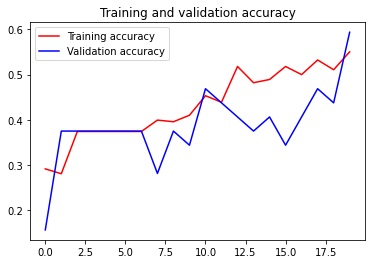

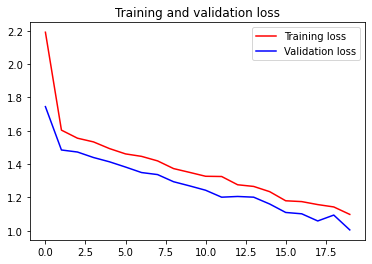

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
saved_model_path = "/content/model.h5"

model2.save(saved_model_path)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model2)
tflite_model = converter.convert()

In [ ]:
import pathlib

tflite_model_file = pathlib.Path('/content/model2.tflite')
tflite_model_file.write_bytes(tflite_model)